In [47]:
import pandas as pd
import seaborn as sns

# Load the dataset
df = pd.read_csv('ex2data1.txt', header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

# Examine the first few rows
df.head()



,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


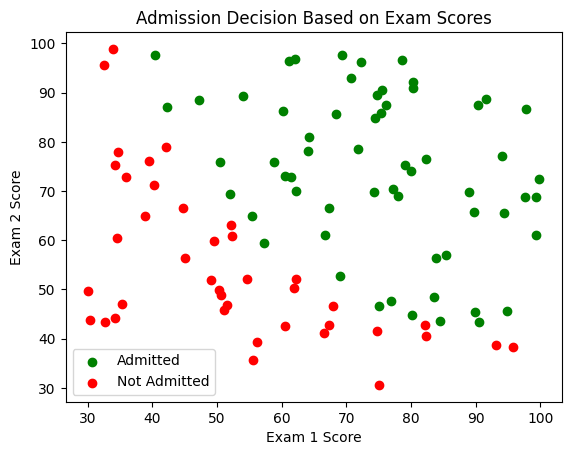

In [48]:
#Create a scatter plot to visualize the data points for students who were admitted versus those who were not based on their exam scores.

import matplotlib.pyplot as plt
df_admitted = df[df['Admitted'] == 1]
df_not_admitted = df[df['Admitted'] == 0]
plt.scatter(df_admitted['Exam 1'], df_admitted['Exam 2'], color='green', label='Admitted')
plt.scatter(df_not_admitted['Exam 1'], df_not_admitted['Exam 2'], color='red', label='Not Admitted')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.title('Admission Decision Based on Exam Scores')
plt.legend()
plt.show()


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

features = df[['Exam 1', 'Exam 2']]
target = df['Admitted']
print(features)
print(target)


       Exam 1     Exam 2
0   34.623660  78.024693
1   30.286711  43.894998
2   35.847409  72.902198
3   60.182599  86.308552
4   79.032736  75.344376
..        ...        ...
95  83.489163  48.380286
96  42.261701  87.103851
97  99.315009  68.775409
98  55.340018  64.931938
99  74.775893  89.529813

[100 rows x 2 columns]
0     0
1     0
2     0
3     1
4     1
     ..
95    1
96    1
97    1
98    1
99    1
Name: Admitted, Length: 100, dtype: int64


In [50]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.70, test_size=0.30, random_state=1)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))


70
30
70
30


In [51]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train.values.ravel())
predictions = model.predict(X_test)
print(predictions)

[1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0]


              Not Admitted  Admitted
Not Admitted            11         3
Admitted                 1        15


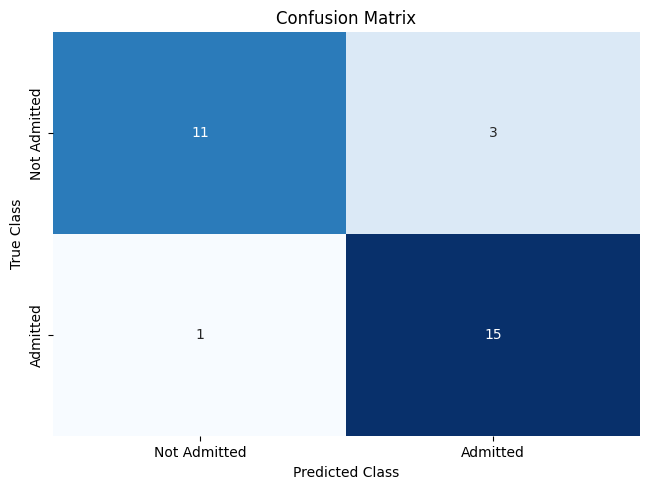

In [52]:
from sklearn.metrics import confusion_matrix
class_names = ['Not Admitted', 'Admitted']
matrix = confusion_matrix(y_test, predictions)
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
print(dataframe)
sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues', fmt='g')
plt.title('Confusion Matrix'), plt.tight_layout()
plt.ylabel('True Class'), plt.xlabel('Predicted Class') 
plt.show()